# MNIST digit classification

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%matplotlib inline

We'll train a simple CNN on the MNIST dataset by copy/pasting [this example](https://keras.io/examples/mnist_cnn/) from the Keras documentation.

In [6]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2720 - acc: 0.9165 - val_loss: 0.0561 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0869 - acc: 0.9745 - val_loss: 0.0384 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0648 - acc: 0.9811 - val_loss: 0.0359 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0527 - acc: 0.9840 - val_loss: 0.0300 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0449 - acc: 0.9866 - val_loss: 0.0314 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0284 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==========================

Now let's predict the class probabilities for the test set.

In [9]:
y_pred = model.predict_proba(x_test)

Run the algorithm.

In [44]:
import ethik

explainer = ethik.ImageExplainer(alpha=0.1, n_jobs=-1)
%time biases = explainer.explain_bias(x_test, y_pred)

CPU times: user 25.5 s, sys: 706 ms, total: 26.2 s
Wall time: 27.1 s


In [52]:
fig, axes = explainer.plot_bias(x_test, y_pred, n_cols=5)

TypeError: explain_bias() got an unexpected keyword argument 'X_test'

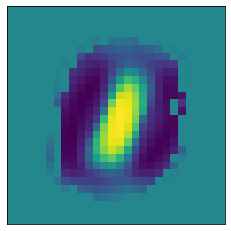

In [210]:
mask = (y_test[:, 0] == 1) | (y_test[:, 1] == 1)

ax = explainer.plot_predictions(x_test[mask], y_pred[mask, 1])

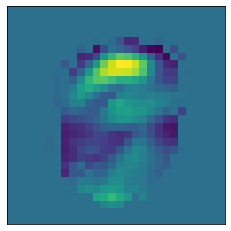

In [208]:
mask = (y_test[:, 4] == 1) | (y_test[:, 9] == 1)

ax = explainer.plot_predictions(x_test[mask], y_pred[mask, 9])

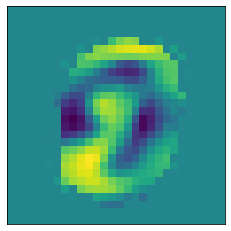

In [209]:
mask = (y_test[:, 8] == 1) | (y_test[:, 9] == 1)

ax = explainer.plot_predictions(x_test[mask], y_pred[mask, 8])

/home/max/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:424: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


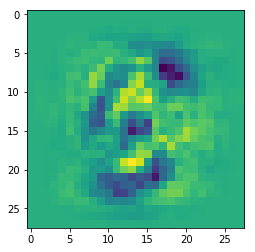

In [207]:
from sklearn import metrics

ax = explainer.plot_metric(
    images=x_test,
    y=y_test.argmax(axis=1),
    y_pred=y_pred.argmax(axis=1),
    metric=metrics.accuracy_score
)